# Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

2024-06-25 17:14:15.771401: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Loading Model

In [3]:
cnn = tf.keras.models.load_model('model_3.keras')

### Visualising and Performing Prediction on Single image

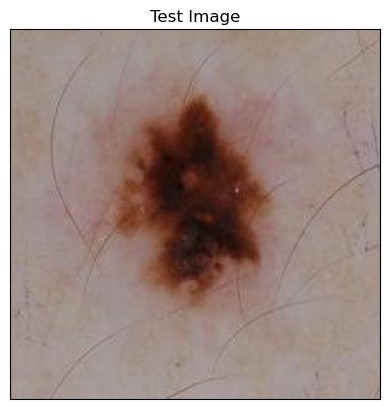

In [14]:
#Test Image Visualization
import cv2
image_path = 'test/Malignant/5636.jpg'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

# Testing Model

In [15]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(224,224))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
print(input_arr.shape)

(1, 224, 224, 3)


In [16]:
prediction = cnn.predict(input_arr)
print("Prediction:", prediction)

1/1 [==============================] - 0s 72ms/step
Prediction: [[0.9707063]]


In [17]:
threshold = 0.5
if prediction >= threshold:
    result_class = "Malignant"
else:
    result_class = "Benign"

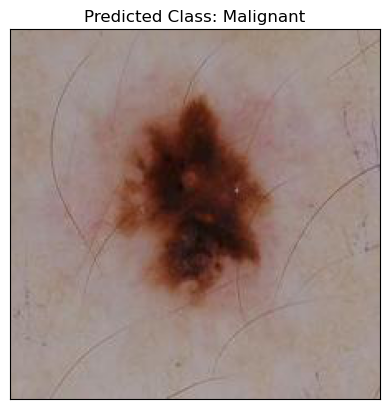

In [18]:
plt.imshow(img)
plt.title(f"Predicted Class: {result_class}")
plt.xticks([])
plt.yticks([])
plt.show()